# Proyek Analisis Data: Bike Sharing
- **Nama:** Sulissetiawati
- **Email:** sulissetwati085@gmail.com
- **ID Dicoding:** sulissetiawati382

## Menentukan Pertanyaan Bisnis

- Bagaimana tren waktu dan pengaruh waktu libur terhadap peningkatan rental sepeda?
- Faktor lingkungan yang mempengaruhi rental sepeda?

## Import Semua Packages/Library yang Digunakan

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [8]:
day_dt = pd.read_csv("data\day.csv")
day_dt 

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Sulissetiawati\AppData\Local\Temp\ipykernel_22068\1851062753.py:1: SyntaxWarning: invalid escape sequence '\d'
  day_dt = pd.read_csv("data\day.csv")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [9]:
hour_dt = pd.read_csv("data\hour.csv")
hour_dt

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Sulissetiawati\AppData\Local\Temp\ipykernel_22068\3000324037.py:1: SyntaxWarning: invalid escape sequence '\h'
  hour_dt = pd.read_csv("data\hour.csv")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

In [10]:
day_dt.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
day_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [12]:
day_dt.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
day_dt.duplicated().sum()

0

In [14]:
hour_dt.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [15]:
filtered_data_hour = hour_dt[((hour_dt['casual'] == 0) & (hour_dt['registered'] == 0))]

result = filtered_data_hour.groupby('hr').size().reset_index(name='count')
print(result)

Empty DataFrame
Columns: [hr, count]
Index: []


In [16]:
hour_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [17]:
hour_dt.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [18]:
hour_dt.duplicated().sum()

0

#### Checking & Handling Outlier Data

##### Day Data

<Axes: ylabel='temp'>

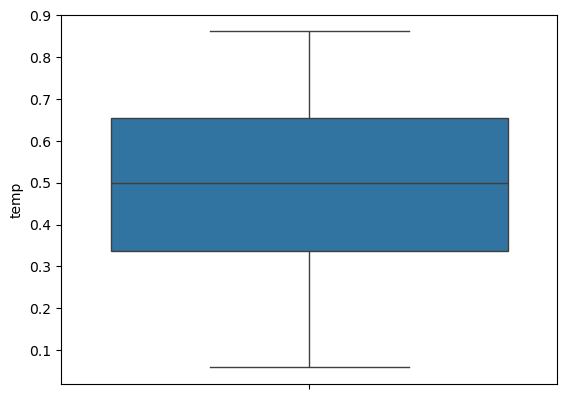

In [19]:
sns.boxplot(day_dt['temp'])

<Axes: ylabel='atemp'>

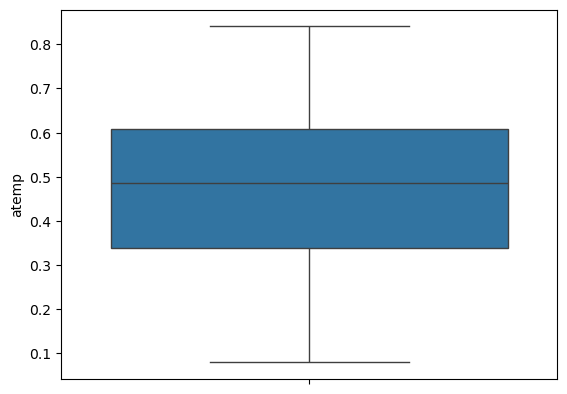

In [20]:
sns.boxplot(day_dt['atemp'])

<Axes: ylabel='hum'>

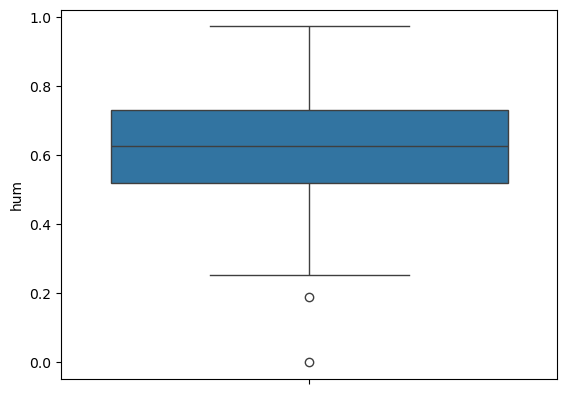

In [21]:
sns.boxplot(day_dt['hum'])

<Axes: ylabel='windspeed'>

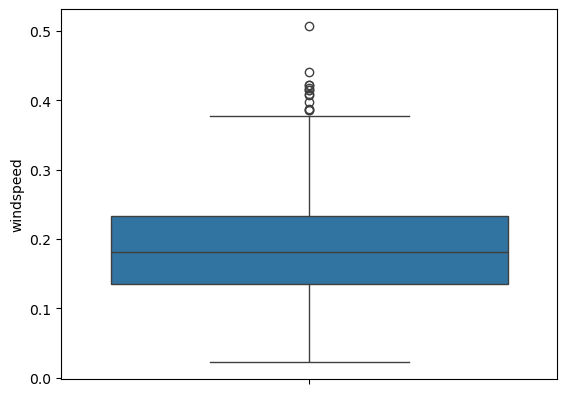

In [22]:
sns.boxplot(day_dt['windspeed'])

##### Hour Data

<Axes: ylabel='temp'>

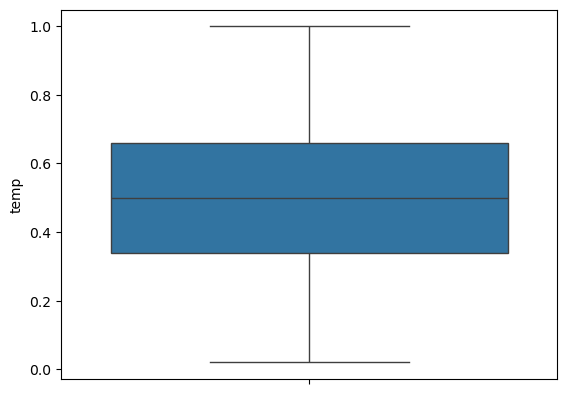

In [23]:
sns.boxplot(hour_dt['temp'])

<Axes: ylabel='atemp'>

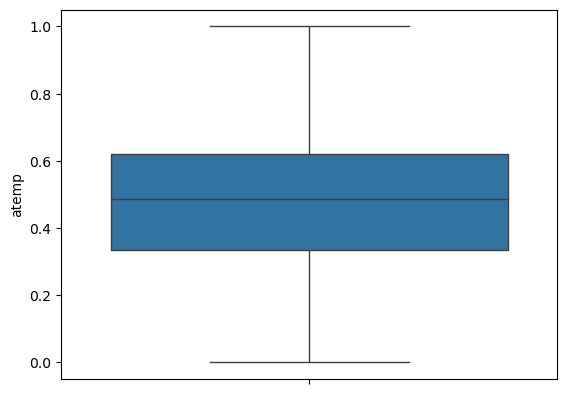

In [24]:
sns.boxplot(hour_dt['atemp'])

<Axes: ylabel='hum'>

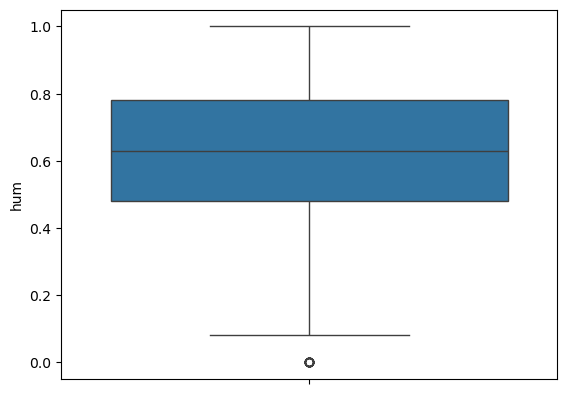

In [25]:
sns.boxplot(hour_dt['hum'])

<Axes: ylabel='windspeed'>

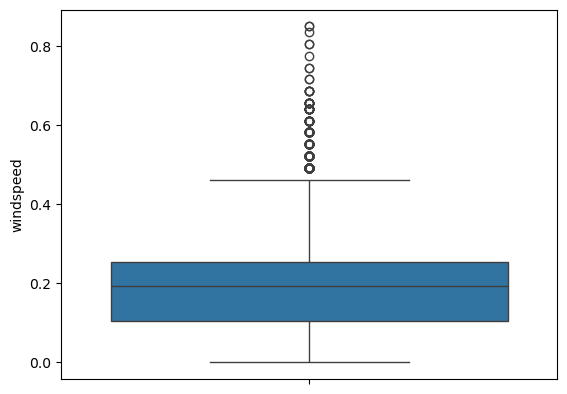

In [26]:
sns.boxplot(hour_dt['windspeed'])

**Insight:**
- Kolom dteday pada tabel day_dt maupun hour_dt seharusnya memiliki format data datetime
- Tidak ada data kosong (null) dan duplikat
- Terdapat outlier data pada kolom 'hum' dan 'windspeed' pada kedua tabel data, namun mempertimbangkan kondisi lingkungan ekstrim yang dapat saja terjadi dengan faktor yang tidak ketahui, maka outlier tidak akan dihilangkan.

### Cleaning Data

#### Formatting data kolom dteday

In [27]:
day_dt["dteday"] = pd.to_datetime(day_dt["dteday"])
day_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [28]:
hour_dt["dteday"] = pd.to_datetime(hour_dt["dteday"])
hour_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

In [29]:
filtered_data = day_dt[(day_dt['holiday'] == 1)]

result = filtered_data.groupby('season').size().reset_index(name='count')
print(result)

   season  count
0       1      7
1       2      4
2       3      4
3       4      6


In [30]:
day_dt.groupby(by=[ "season", 'workingday']).agg({
    "registered": "mean",
    "casual": "mean",
     "cnt": "sum"
})

registered       casual     cnt
season workingday                                  
1      0           1725.950820   531.147541  137683
       1           2545.358333   235.183333  333665
2      0           3255.053571  1887.375000  287976
       1           4162.375000   764.289062  630613
3      0           3591.421053  1883.245614  312056
       1           4811.656489   906.458015  749073
4      0           3355.438596  1250.771930  262554
       1           4302.239669   483.371901  579059

In [31]:
day_dt.groupby(by=[ "season", 'holiday']).agg({
    "registered": "mean",
    "casual": "mean",
     "cnt": "sum"
})

registered       casual      cnt
season holiday                                   
1      0        2304.919540   336.074713   459533
       1        1381.428571   306.428571    11815
2      0        3896.533333  1097.644444   898952
       1        3422.750000  1486.500000    19637
3      0        4462.146739  1180.777174  1038298
       1        3500.750000  2207.000000    22831
4      0        4029.761628   722.918605   817461
       1        3118.666667   906.666667    24152

In [32]:
day_dt.groupby(by=[ "season", 'holiday', 'workingday']).agg({
    "registered": "mean",
    "casual": "mean",
     "cnt": "sum"
})

registered       casual     cnt
season holiday workingday                                  
1      0       0           1770.611111   560.277778  125868
               1           2545.358333   235.183333  333665
       1       0           1381.428571   306.428571   11815
2      0       0           3242.153846  1918.211538  268339
               1           4162.375000   764.289062  630613
       1       0           3422.750000  1486.500000   19637
3      0       0           3598.264151  1858.811321  289225
               1           4811.656489   906.458015  749073
       1       0           3500.750000  2207.000000   22831
4      0       0           3383.294118  1291.254902  238402
               1           4302.239669   483.371901  579059
       1       0           3118.666667   906.666667   24152

In [33]:
hour_dt.groupby(by=[ "season", 'holiday']).agg({
    "registered": "mean",
    "casual": "mean",
     "cnt": "sum"
})

registered     casual      cnt
season holiday                                
1      0         98.346248  14.339627   459533
       1         58.963415  13.079268    11815
2      0        162.619059  45.809413   898952
       1        142.614583  61.937500    19637
3      0        186.598864  49.377955  1038298
       1        145.864583  91.958333    22831
4      0        169.549658  30.416341   817461
       1        129.944444  37.777778    24152

In [34]:
hour_dt.groupby(by=[ "season", 'workingday']).agg({
    "registered": "mean",
    "casual": "mean",
     "cnt": "sum"
})

registered     casual     cnt
season workingday                               
1      0            72.709254  22.375691  137683
       1           109.321045  10.100931  333665
2      0           135.728220  78.699181  287976
       1           173.771689  31.907697  630613
3      0           151.078229  79.221402  312056
       1           200.677173  37.805158  749073
4      0           139.809942  52.115497  262554
       1           181.763617  20.421788  579059

In [35]:
hour_dt.groupby(by=[ "season", 'holiday', 'workingday']).agg({
    "registered": "mean",
    "casual": "mean",
     "cnt": "sum"
})

registered     casual     cnt
season holiday workingday                               
1      0       0            74.464953  23.563084  125868
               1           109.321045  10.100931  333665
       1       0            58.963415  13.079268   11815
2      0       0           135.198075  79.989575  268339
               1           173.771689  31.907697  630613
       1       0           142.614583  61.937500   19637
3      0       0           151.475774  78.250199  289225
               1           200.677173  37.805158  749073
       1       0           145.864583  91.958333   22831
4      0       0           140.970588  53.802288  238402
               1           181.763617  20.421788  579059
       1       0           129.944444  37.777778   24152

**Insight**
- Penggunaan rental sepeda pada hari kerja menunjukkan jumlah yang tinggi di hampir semua musim (season) dikarenakan pengguna berasal dari pekerja atau anak sekolah (mahasiswa).
- Selama hari libur di musim gugur (fall), rata-rata jumlah pengguna casual rental sepeda meningkat >200% dibandingkan hari kerja. Jumlah ini juga lebih tinggi dibandingkan dengan musim semi (spring), meskipun musim semi memiliki jumlah hari libur di akhir pekan paling banyak, yaitu sebanyak 7 hari.

In [36]:
temp_bins = [0.02, 0.3, 0.5, 0.7, 1.0]  # Sesuaikan rentang ini
temp_labels = ['Cold', 'Mild', 'Warm', 'Hot']

hour_dt['temp_category'] = pd.cut(hour_dt['temp'], bins=temp_bins, labels=temp_labels, right=True)


hour_dt.groupby(by=["temp_category"]).agg({
    "registered": "mean",
    "casual": "mean",
    "cnt": "sum"
})

C:\Users\Sulissetiawati\AppData\Local\Temp\ipykernel_22068\339222256.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_dt.groupby(by=["temp_category"]).agg({


,registered,casual,cnt
temp_category,,,
Cold,78.020589,6.564484,295794
Mild,136.575196,24.351852,860316
Warm,174.981145,44.080219,1278004
Hot,241.399255,78.099069,857853


In [37]:
bins = [0, 0.3, 0.4, 0.6, 0.7, 1.0]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High'] 

hour_dt['humidity_category'] = pd.cut(hour_dt['hum'], bins=bins, labels=labels, right=True)
hour_dt.groupby(by=["humidity_category"]).agg({
    "registered": "mean",
    "casual": "mean",
    "cnt": "sum"
})

C:\Users\Sulissetiawati\AppData\Local\Temp\ipykernel_22068\3719708282.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_dt.groupby(by=["humidity_category"]).agg({


,registered,casual,cnt
humidity_category,,,
Very Low,228.623670,67.610372,222768
Low,218.299707,66.109091,484917
Moderate,177.589166,44.156517,1219823
High,152.120748,33.770068,546519
Very High,108.965165,17.684316,818029


In [38]:
windspeed_bins = [0.0, 0.25, 0.5, 1.0]  
windspeed_labels = [ 'Low', 'Moderate', 'High']  

hour_dt['windspeed_category'] = pd.cut(day_dt['windspeed'], bins=windspeed_bins, labels=windspeed_labels, right=True)

hour_dt.groupby(by=["windspeed_category"]).agg({
    "registered": "mean",
    "casual": "mean",
    "cnt": "sum"
})

C:\Users\Sulissetiawati\AppData\Local\Temp\ipykernel_22068\936113029.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_dt.groupby(by=["windspeed_category"]).agg({


,registered,casual,cnt
windspeed_category,,,
Low,51.213922,4.317487,32708
Moderate,53.333333,4.510638,8156
High,1.000000,0.000000,1


In [39]:
weather_to_cnt = hour_dt.pivot_table(index=['weathersit'],
                       values=['cnt'],
                       aggfunc='mean').reset_index()

weather_to_cnt = weather_to_cnt[[ 'weathersit','cnt']]
weather_to_cnt

,weathersit,cnt
0,1,204.869272
1,2,175.165493
2,3,111.579281
3,4,74.333333


**Insight:**
- Pada kondisi lingkungan ekstrim seperti temperatur dingin, kelembapan rendah, kecepatan angin tinggi, dan cuaca buruk menunjukkan angka penggunaan rental sepeda rendah

## Visualization & Explanatory Analysis

### Pertanyaan 1:

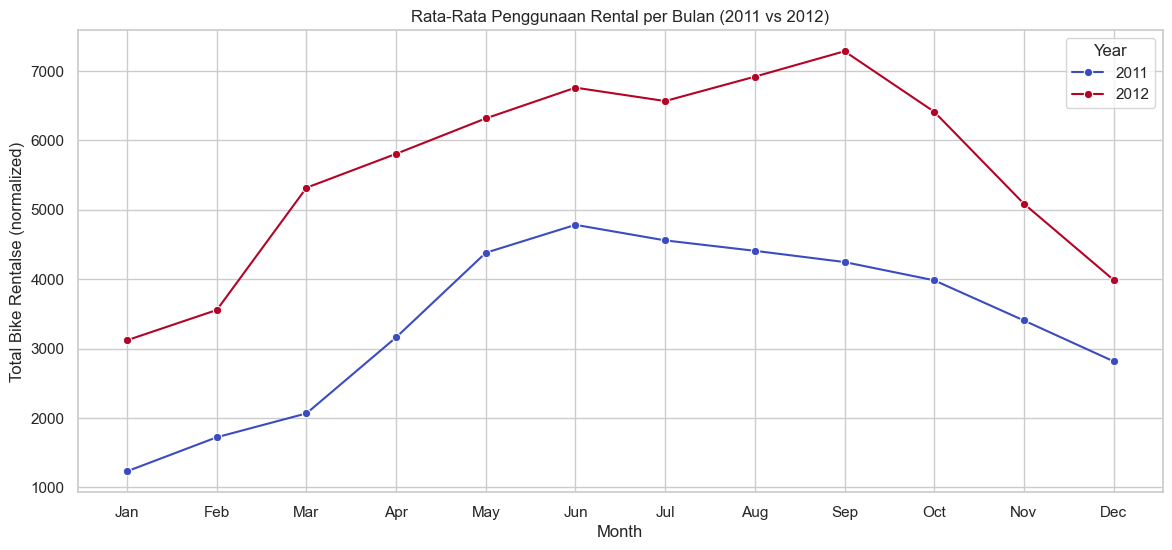

In [40]:
day_dt['month'] = day_dt['dteday'].dt.month
day_dt['year'] = day_dt['dteday'].dt.year

count_month = day_dt.groupby(['year', 'month'])['cnt'].mean().reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))
sns.lineplot(data=count_month, x='month', y='cnt', hue='year', marker='o', palette="coolwarm")
plt.title('Rata-Rata Penggunaan Rental per Bulan (2011 vs 2012)')
plt.xlabel('Month')
plt.ylabel('Total Bike Rentalse (normalized)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend(title='Year', loc='upper right')
plt.show()



C:\Users\Sulissetiawati\AppData\Local\Temp\ipykernel_22068\2667079414.py:7: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(


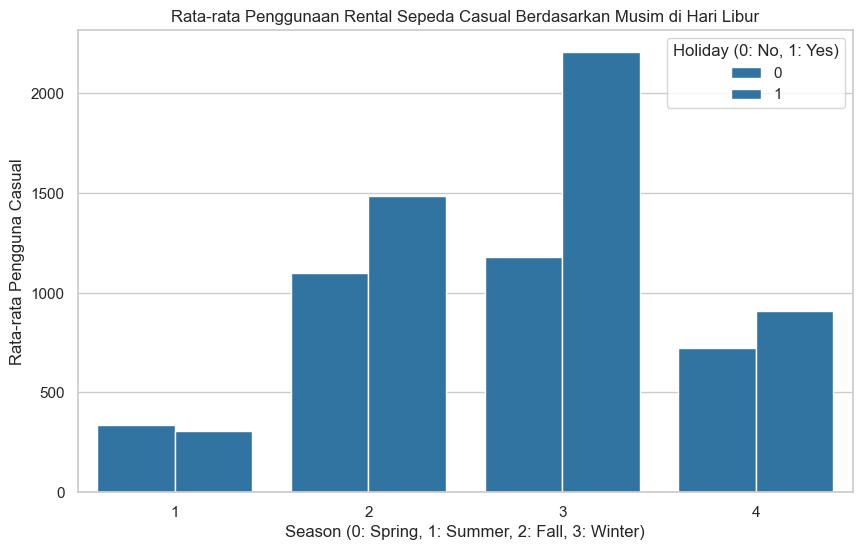

In [41]:

season_avg = day_dt.groupby(['season', 'holiday'])['casual'].mean().reset_index()

season_avg['is_max'] = season_avg['casual'] == season_avg['casual'].max()
plt.figure(figsize=(10, 6))
palette = ['#1f77b4' if not max_flag else '#ff7f0e' for max_flag in season_avg['is_max']]

sns.barplot(
    x='season', y='casual', hue='holiday', data=season_avg, dodge=True, palette=palette
)

plt.title('Rata-rata Penggunaan Rental Sepeda Casual Berdasarkan Musim di Hari Libur')
plt.xlabel('Season (0: Spring, 1: Summer, 2: Fall, 3: Winter)')
plt.ylabel('Rata-rata Pengguna Casual')
plt.legend(title='Holiday (0: No, 1: Yes)', loc='upper right')

plt.show()


### Pertanyaan 2:

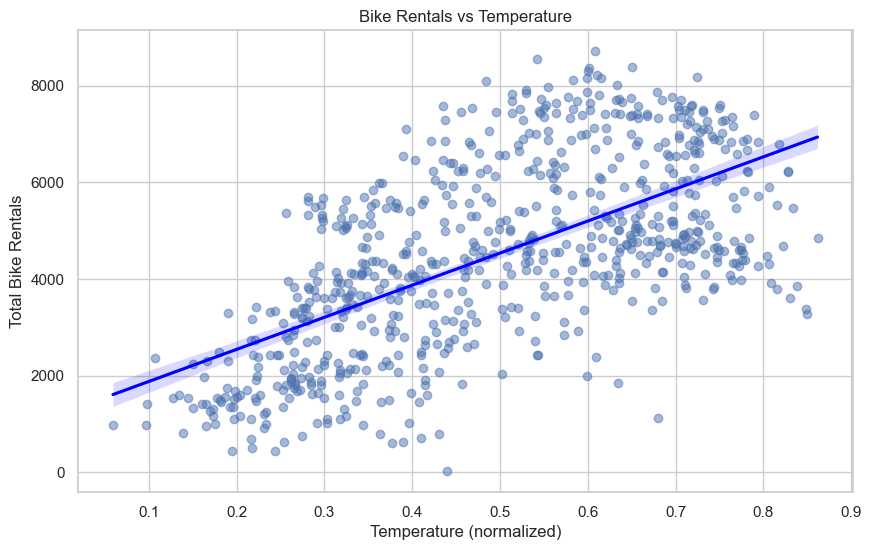

In [42]:
plt.figure(figsize=(10, 6))
sns.regplot(data=day_dt, x='temp', y='cnt', scatter_kws={'alpha': 0.5}, line_kws={'color': 'blue'})
plt.title('Bike Rentals vs Temperature')
plt.xlabel('Temperature (normalized)')
plt.ylabel('Total Bike Rentals')
plt.show()

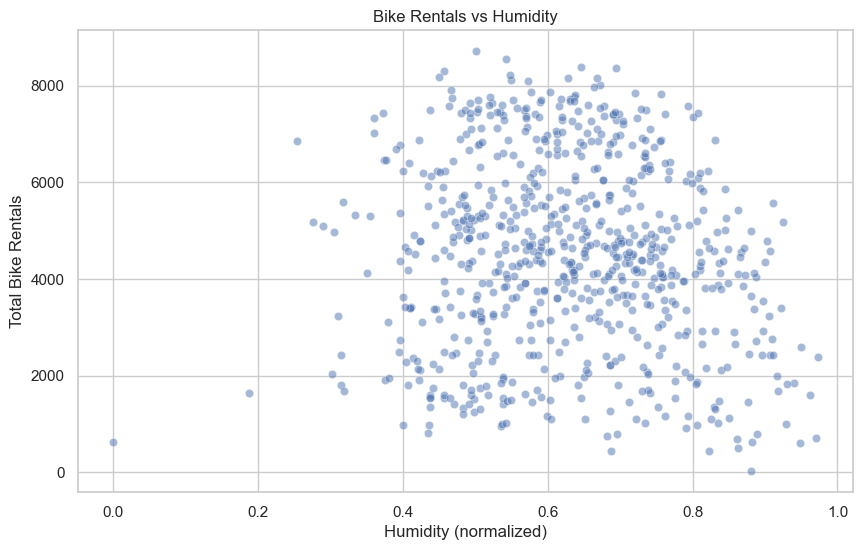

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day_dt, x='hum', y='cnt', alpha=0.5)
plt.title('Bike Rentals vs Humidity')
plt.xlabel('Humidity (normalized)')
plt.ylabel('Total Bike Rentals')
plt.show()

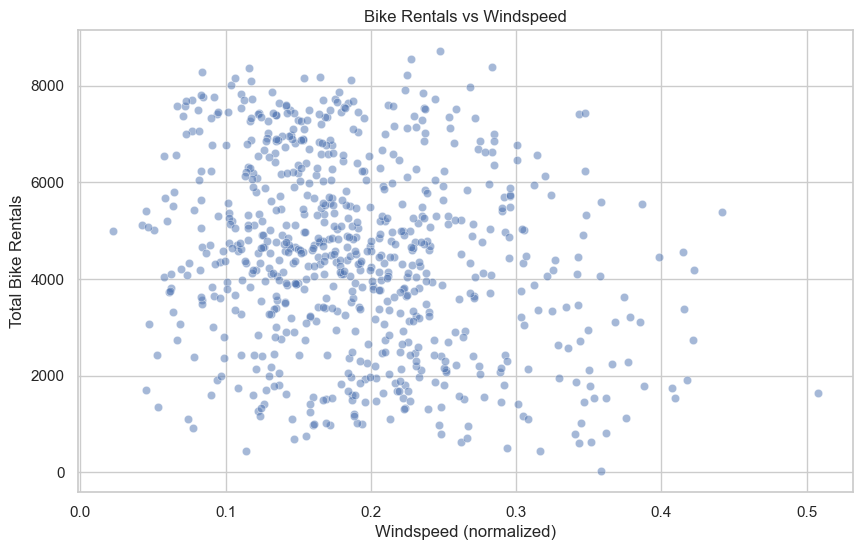

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day_dt, x='windspeed', y='cnt', alpha=0.5)
plt.title('Bike Rentals vs Windspeed')
plt.xlabel('Windspeed (normalized)')
plt.ylabel('Total Bike Rentals')
plt.show()

C:\Users\Sulissetiawati\AppData\Local\Temp\ipykernel_22068\1767760160.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weathersit', data=hour_dt, palette=colors)


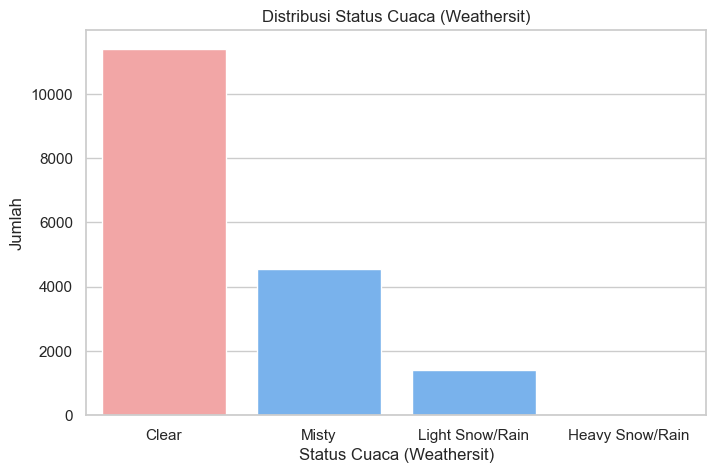

In [45]:
weather_counts = hour_dt['weathersit'].value_counts()

colors = ['#FF9999', '#66B2FF', '#66B2FF', '#66B2FF'] 

min_count = weather_counts.min()
min_index = weather_counts.idxmin()  
colors[weather_counts.index.get_loc(min_index)] = '#FF9999' 

plt.figure(figsize=(8, 5))
sns.countplot(x='weathersit', data=hour_dt, palette=colors)

# Menambahkan judul dan label
plt.title('Distribusi Status Cuaca (Weathersit)')
plt.xlabel('Status Cuaca (Weathersit)')
plt.ylabel('Jumlah')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Misty', 'Light Snow/Rain', 'Heavy Snow/Rain'])

# Menampilkan plot
plt.show()


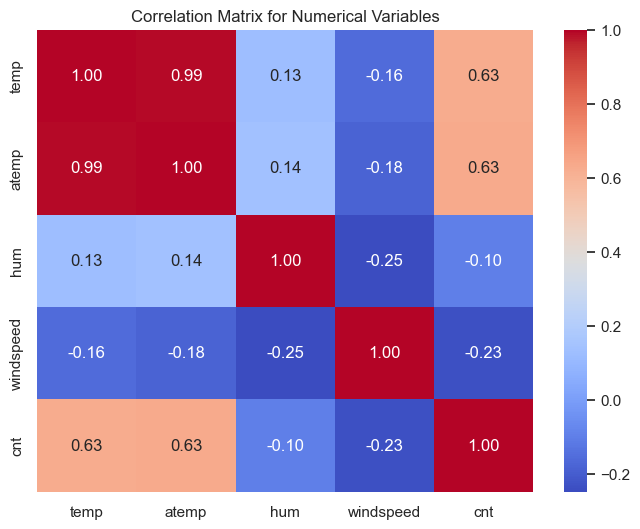

In [46]:
correlation_matrix = day_dt[['temp', 'atemp', 'hum', 'windspeed','cnt']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

**Insight:**
- Tren yang hampir sama antara tahun 2011 dan 2012 dan relatif meningkat pada bulan maret-juni, namun pada 2012 terdapat peningkatan tren pada bulan agustus dan september
- Pada kondisi lingkungan ekstrim penggunaan rental sepeda rendah, namun tidak secara signifikan mempengaruhi jumlah pengguna rental sepeda
- Temperatur merupakan salah satu faktor lingkungan yang cukup signufikan mempengaruhi penggunaan rental sepeda

## Conclusion

- Tren jumlah rata-rata penggunaan sepeda pada bulan maret-juni, dan di tahun 2012 meningkat hingga bulan september dibandingkan tahun 2011.
- Faktor lingkungan yang mempengaruhi penggunaan rental sepeda adalah temperatur, namun dalam kondisi lainnya yang cukup ektrim penggunaan sepeda relatif menurun